### Lecture 5: Introduction to Music21
This notebook targets quick introduction to music21. 
It is simply a short summary of the content on:  http://web.mit.edu/music21/doc/usersGuide/usersGuide_01_installing.html 


In [1]:
import music21
import urllib.request

#### Note objects and features

In [2]:
#Creating note objects and accessing features
myNote_1 = music21.note.Note("B-4")#Flat and sharp note examples Bb: note.Note("B-2"), C#:note.Note("C#3")
print('Note created has\n  name:',myNote_1.name,myNote_1.pitch.unicodeName,',octave:',myNote_1.octave,'\n  pitch:', myNote_1.pitch.fullName,'\n  frequency: ',myNote_1.pitch.frequency, 'Hz',',midiNo:',myNote_1.pitch.midi)
#Applying transposition
print('\nNew note obtained by transposing the first by a major third:')
myNote_2 = myNote_1.transpose("M3")
print('Note created has\n  name:',myNote_2.name,myNote_2.pitch.unicodeName,',octave:',myNote_2.octave,'\n  pitch:', myNote_2.pitch.fullName,'\n  frequency: ',myNote_2.pitch.frequency, 'Hz',',midiNo:',myNote_2.pitch.midi)

Note created has
  name: B- B♭ ,octave: 4 
  pitch: B-flat in octave 4 
  frequency:  466.1637615180899 Hz ,midiNo: 70

New note obtained by transposing the first by a major third:
Note created has
  name: D D ,octave: 5 
  pitch: D in octave 5 
  frequency:  587.3295358348153 Hz ,midiNo: 74


In [3]:
#setting duration and lyrics to a note
myNote_2.duration.quarterLength = 3.0
myNote_2.lyric = "We will rock you"

#### Note streams
A practical data structure to keep a sequence of notes

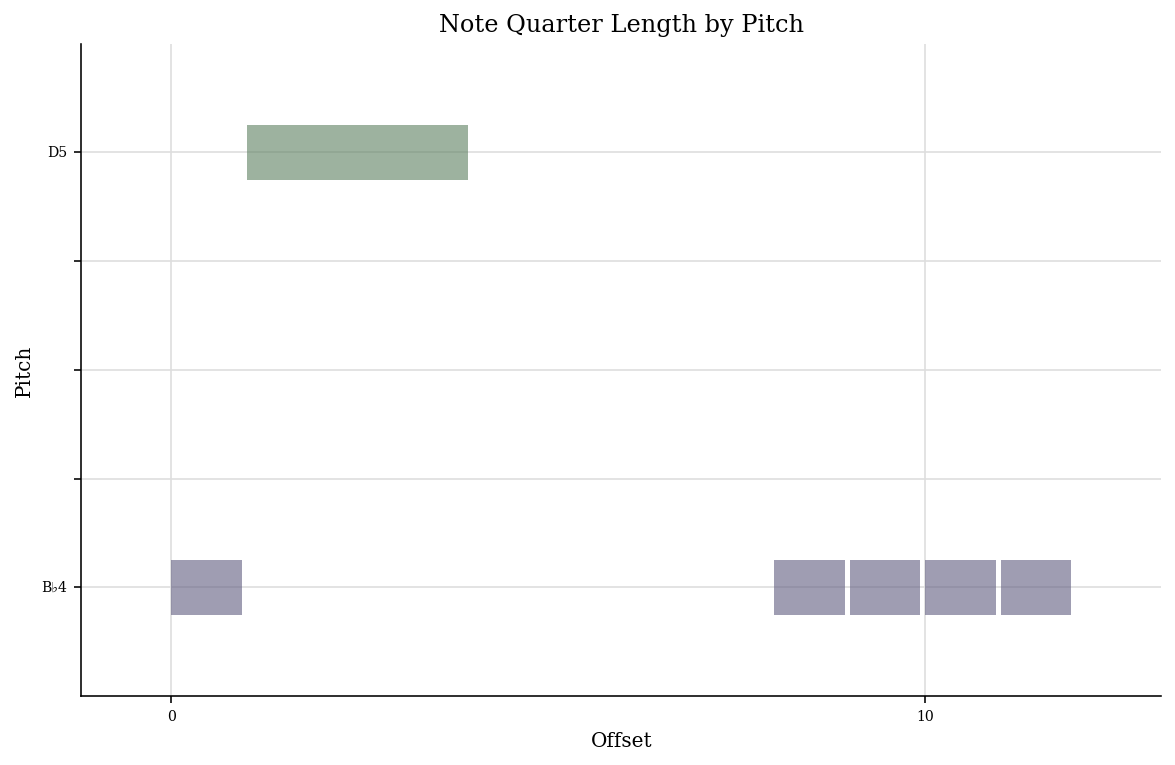

In [4]:
noteStream = music21.stream.Stream()
noteStream.append(myNote_1)
noteStream.append(myNote_2)
noteStream.append(music21.note.Rest(type = 'whole'))
noteStream.repeatAppend(myNote_1, 4)
noteStream.plot()

In [5]:
#Accessing notes of a stream
for thisNote in noteStream:
    if not thisNote.isRest:
        print('Name:',thisNote.pitch.unicodeName,',midiNo:',thisNote.pitch.midi)
    else:
        print('Rest, duration',thisNote.duration.quarterLength,' quarters')

Name: B♭ ,midiNo: 70
Name: D ,midiNo: 74
Rest, duration 4.0  quarters
Name: B♭ ,midiNo: 70
Name: B♭ ,midiNo: 70
Name: B♭ ,midiNo: 70
Name: B♭ ,midiNo: 70


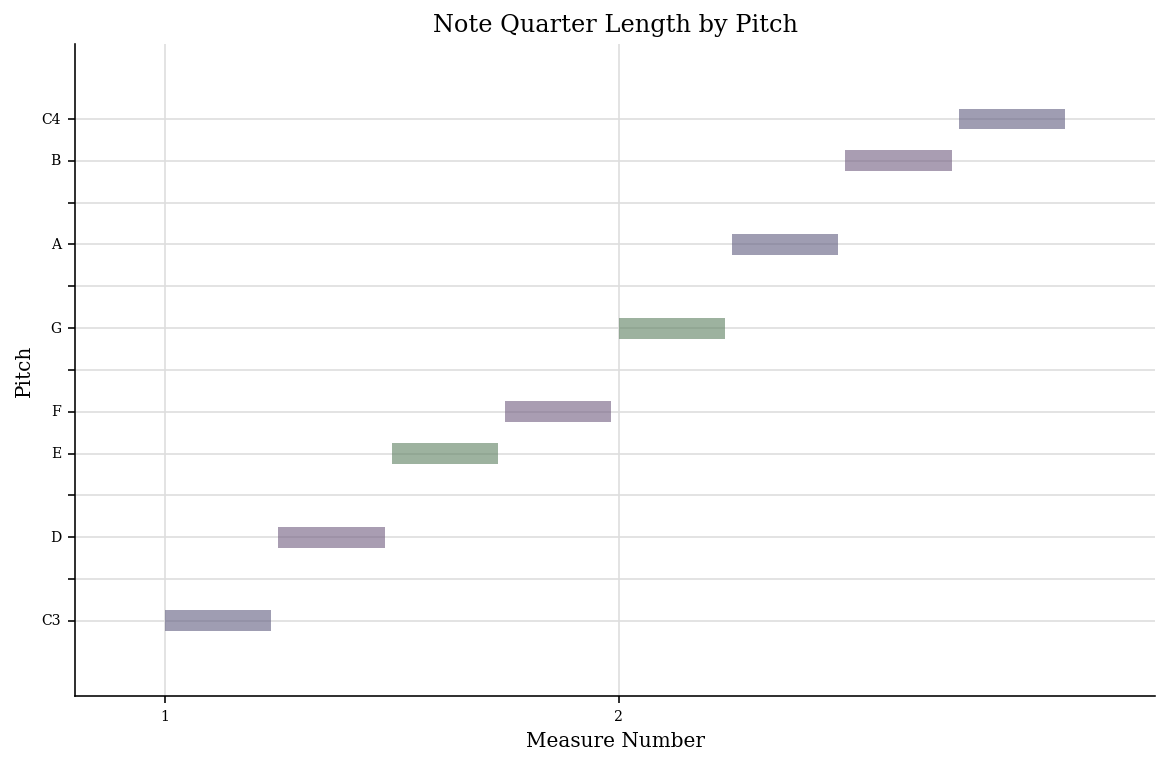

In [6]:
#Quick creation of a note stream
s = music21.converter.parse('tinyNotation: 4/4 C4 D4 E4 F4 G4 A4 B4 c4')
s.plot()

In [7]:
#Creating interval objects
myInterval = music21.interval.Interval('P5')
print('Interval created: ',myInterval.niceName,',size in semitones:',myInterval.semitones,',complement:',myInterval.complement)

Interval created:  Perfect Fifth ,size in semitones: 7 ,complement: <music21.interval.Interval P4>


In [8]:
#Different intervals available
for intName in ['d5','A2','A4','P4','m2','M6']:
    iTemp = music21.interval.Interval(intName)
    print(intName,':\t',iTemp.niceName)

d5 :	 Diminished Fifth
A2 :	 Augmented Second
A4 :	 Augmented Fourth
P4 :	 Perfect Fourth
m2 :	 Minor Second
M6 :	 Major Sixth


In [9]:
#Interval between two notes
print('Interval between E4 and A4:',music21.interval.Interval(music21.note.Note('E4'), music21.note.Note('A4')).niceName)

Interval between E4 and A4: Perfect Fourth


#### Reading scores and processing the content

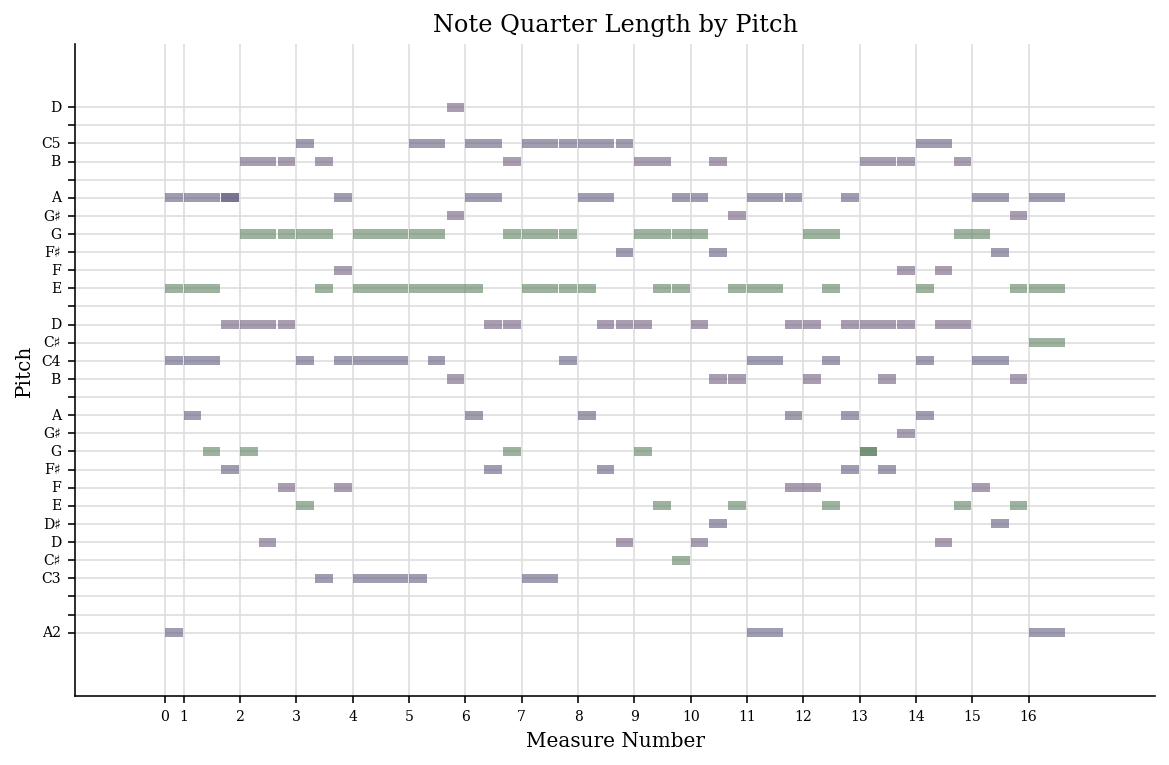

In [10]:
#Music21 has a collection of scores (self contained, no need for downloading)
piece = music21.corpus.parse('bach/bwv65.2.xml')
piece.plot()

Soprano


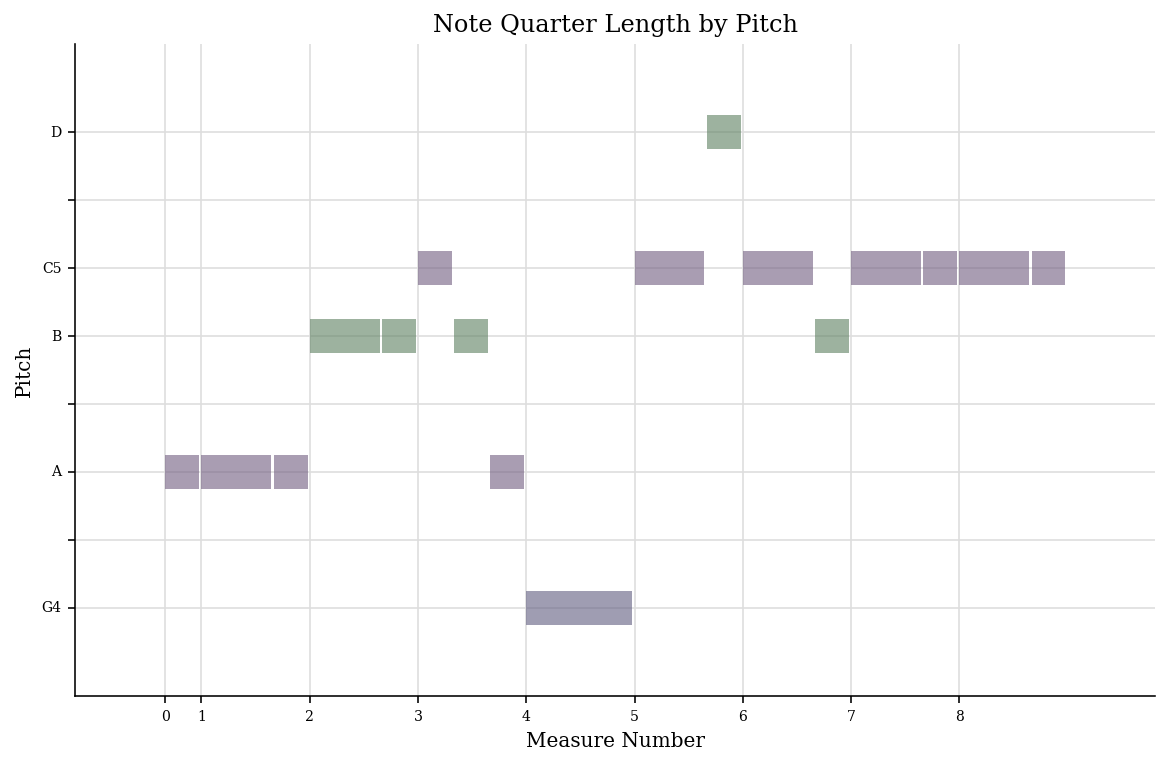

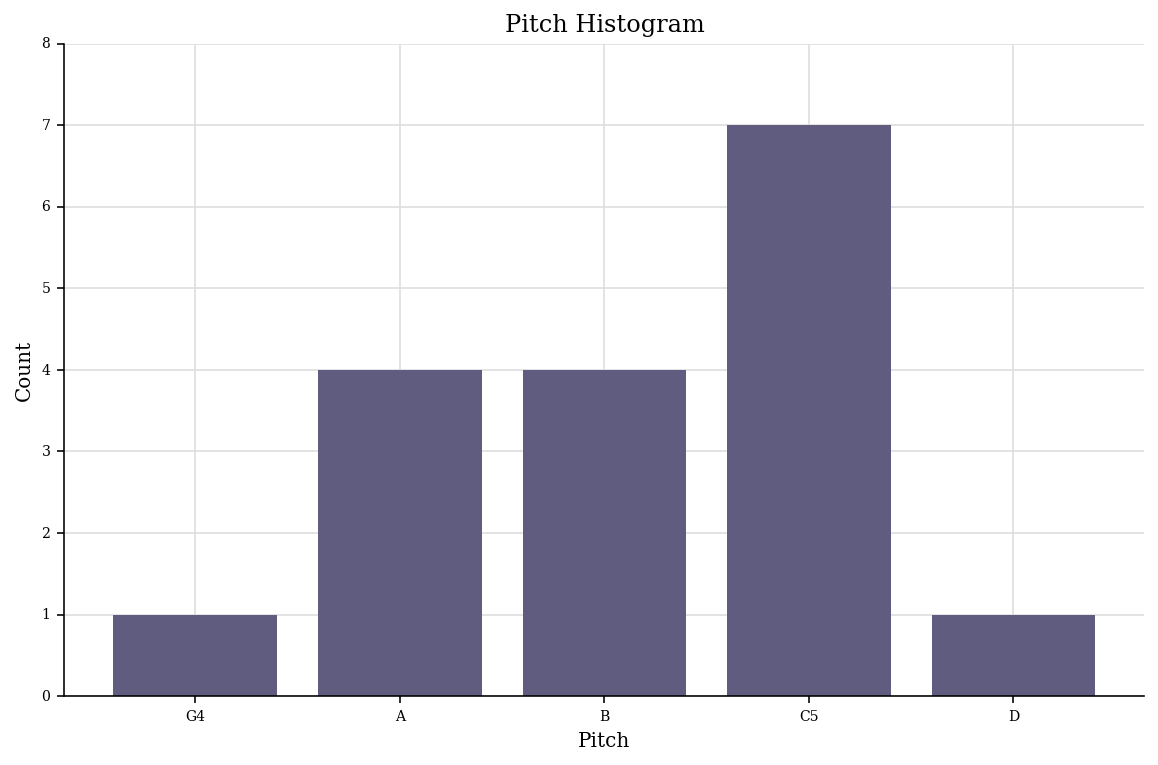

In [11]:
#Accessing one part, specific measures and plotting pitch-class histograms
part = piece.parts[0]
print(part.partName)
part.measures(0,8).plot()#plotting piano-roll of measures 0-8 of the first part
part.measures(0,8).plot('histogram', 'pitch')#plotting histogram of that section

available plotting options: http://web.mit.edu/music21/doc/moduleReference/moduleGraphPlot.html#music21.graph.plot.ScatterPitchSpaceQuarterLength


In [12]:
#You can access the list of files in the corpus
corpusFilePaths = music21.corpus.getCorePaths()#for list of files with specific format: kernFilePaths = corpus.getCorePaths('krn')
print('Number of files in corpus: ',len(corpusFilePaths))
print('\nExample files from the corpus:')
numExamples = 4
for k in range(0,len(corpusFilePaths),int(len(corpusFilePaths)/(numExamples-1))):
    print('index ',k,' ',corpusFilePaths[k].split('/')[-2:])

Number of files in corpus:  3189

Example files from the corpus:


AttributeError: ignored

In [13]:
#Downloading a midi file and reading its content
urllib.request.urlretrieve('http://zzaj.web.fc2.com/score/BlueTrain.mid','BlueTrain_Jcoltrane.mid')
blueTrain = music21.converter.parse('BlueTrain_Jcoltrane.mid')

In [14]:
#Printing parts included
index = 0
for part in blueTrain.parts:
    print('index ',index,' ',part.partName)
    index += 1

index  0   Tenor Saxophone
index  1   Trumpet
index  2   Trombone
index  3   Piano
index  4   Acoustic Bass
index  5   Piano


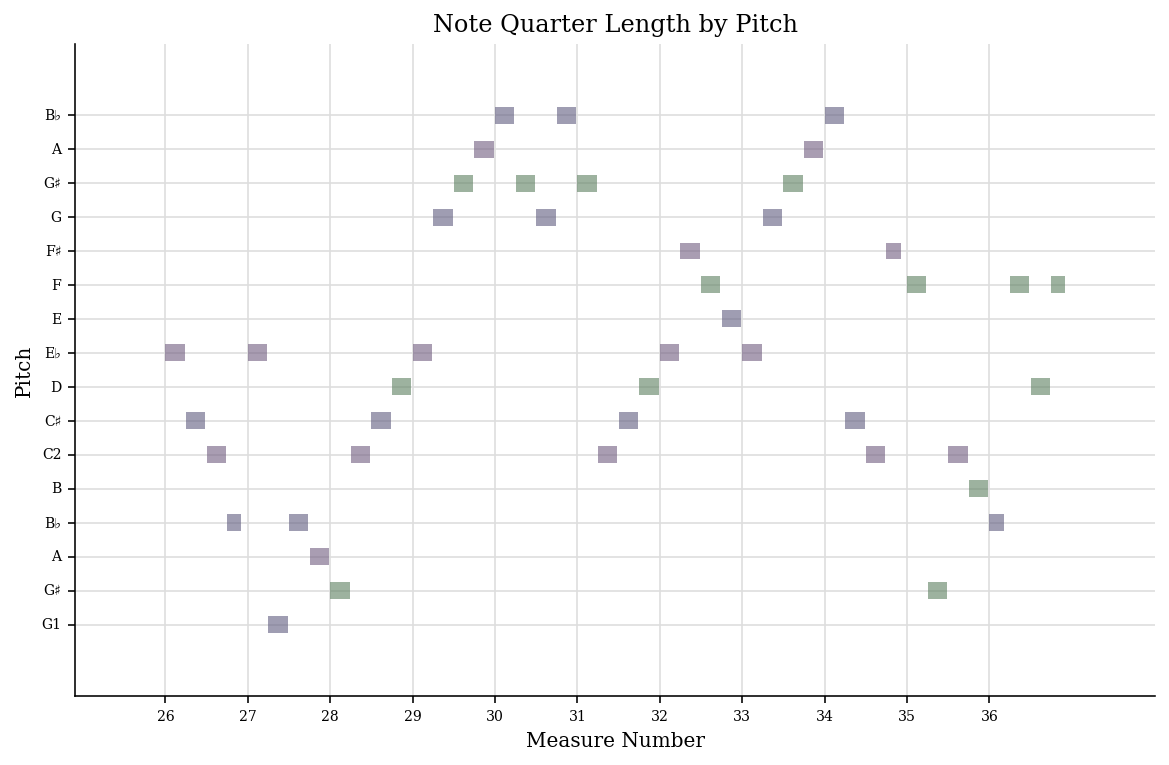

In [15]:
#Printing the some measures (walking bass part of the bass line)
blueTrain.parts[4].measures(26,36).plot()

For another Music21 introduction notebook:
http://nbviewer.ipython.org/github/mantaraya36/240E-ipython/blob/master/Symbolic%20MIR%20Using%20Music21.ipynb